In [2]:
import pandas as pd
import numpy as np
import scipy.stats as st
import pylab as pl
import os
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import parametros.paramMaxVerLN3P

In [3]:
#ruta = r"C:\Users\sear2\Music\analisis_frecuencias\Analisis_de_Frecuencias\gastos\datos2014.csv"  # Estupido windows
ruta = "/home/sear/Documentos/repos_git/analisis_frec/Analisis_de_Frecuencias/gastos/datos2014.csv"  # Linux
print(f"\nArchivo: \n {ruta}")


Archivo: 
 /home/sear/Documentos/repos_git/analisis_frec/Analisis_de_Frecuencias/gastos/datos2014.csv


In [4]:
datos = pd.read_csv(ruta, header=None).values  # Se crea un  array
datos.astype(float)
print(type(datos))
#print(datos)
print(len(datos))
gastos = datos.copy()

<class 'numpy.ndarray'>
62


### <font color="aqua">**Nota**</font>
datos: Es el arreglo original de NumPy.

* copy(): Este método crea una copia profunda (deep copy) del arreglo. Esto significa que gastos será un nuevo arreglo con los mismos valores que datos, pero ocupará un espacio diferente en la memoria. Cualquier modificación que hagas en gastos no afectará a datos, y viceversa.

* gastos: Es la nueva variable que almacena la copia del arreglo datos.

**¿Por qué usar .copy()?**
* Usar .copy() es útil cuando quieres trabajar con una versión independiente de un arreglo, evitando que los cambios en una variable afecten a la otra. Si simplemente hicieras gastos = datos, ambas variables apuntarían al mismo objeto en memoria, y los cambios en una se reflejarían en la otra.

* En este caso, gastos se ocupa en parametros.paramMaxVerLN3P para determinar los parámetros por el método de máxima verosimilitud.

In [5]:
m = datos.size
media = np.mean(datos)
sM =  np.std(datos, ddof=1)  # Calcula la desviación estándar muestral
sP = np.std(datos)           # Desviación estándart poblacional
rv1 = st.norm
EEstandart = np.full((m, 2), -999, float) # Se crea un vector con m elementos 
print("Número de datos: ", m)             # y dos columnas. 
print("Media: ", media)
print("Desviación estandart poblacional: ", sP)
print("Desviación estandart muestral: ", sM)

Número de datos:  62
Media:  2148.935483870968
Desviación estandart poblacional:  2149.7862824834
Desviación estandart muestral:  2167.3358494460485


In [6]:
matriz01 = np.zeros ((m, 7))
matriz02 = np.zeros ((m, 5))
matriz02 [:] = -999
matriz02 [0, 0] = 2
matriz02 [1, 0] = 5
matriz02 [2, 0] = 10
matriz02 [3, 0] = 20
matriz02 [4, 0] = 50
matriz02 [5, 0] = 100
matriz02 [6, 0] = 200
matriz02 [7, 0] = 500
matriz02 [8, 0] = 1000
matriz02 [9, 0] = 2000
matriz02 [10, 0] = 5000
matriz02 [11, 0] = 10000

In [7]:
for i in range (m):
    matriz01 [i, 0] = i + 1                      # Se crea la columna para el No de Orden
    matriz01 [i, 1] = datos.max()             # Se crea la columna que contiene los gastos registrados
    j = datos.argmax()                        # ordenado en forma descendente
    datos [j, 0] = -1
    matriz01 [i, 2] = (m + 1)/matriz01[i,0]      # Se crea la columna con los periodos de retorno
                                                 # (Tr) a partir de la columna de los gastos registrados ordenados
    matriz01 [i, 3] = 1-(1/matriz01[i, 2])       # Se crea la columna para los valores de F(x) a partir de Tr
    matriz01 [i, 4] = -rv1.isf(matriz01[i, 3])   # Se hace el ajuste (z)


## <font color="aqua">Estimación de parámetros por el método de momentos</font>

In [8]:
gsesg = 0
for i in range (m):                              # Se calcula la desviacion estandart
            
    prueba = (matriz01[i, 1] - media) ** 3
    gsesg = gsesg + prueba

gsesg = gsesg / (m * (sP**3))                     # Coeficiente de asimetria sesgado
print(f'gsesg = {gsesg}')
ginsesg = (gsesg * (m**2)) / ((m-1) * (m-2))     # Coeficiente de asimetria insesgado
print(f'ginsesg = {ginsesg}')
w = ((((ginsesg**2)+4)**0.5) -ginsesg) / 2       # Omega
print(f'omega = {w}')
etaX = sM / media                                # Eta X
print(f'etaX = {etaX}')
etaZ = (1 - (w**(2.0/3))) / w**(1.0/3)           # Eta Z
print(f'etaZ = {etaZ}')

gsesg = 3.9511332969822783
ginsesg = 4.149769506448054
omega = 0.22840566249899474
etaX = 1.0085625490914858
etaZ = 1.0246551483575175


In [9]:
x0_Mom = media * (1 - (etaX/etaZ))
muY_Mom = np.log(sM / etaZ) - (0.5 * np.log(etaZ**2 + 1))
sigmaY_Mom = (np.log(etaZ**2 + 1)) ** 0.5
print(f'x0_Mom = {x0_Mom}')
print(f'muY_Mom = {muY_Mom}')
print(f'sigmaY_mom = {sigmaY_Mom}')

x0_Mom = 33.74985003093479
muY_Mom = 7.297997919380427
sigmaY_mom = 0.8472307104744363


## <font color="aqua">Estimación de parámetros por el método de Máxima Verosimilitud</font>

In [10]:
parametrosMV = parametros.paramMaxVerLN3P.parametros(gastos)  # Se estiman los parámetros 
x0_MV = parametrosMV[0]     # Parámetro (X0) por el metodo de máxima verosimilitud
paramMV = parametrosMV[1]
muY_MV =paramMV[0]          # Parametro (muy) por el metodo de máxima verosimilitud
sigmaY_MV = paramMV[1]      # Parámetro (sigmay) por el metodo de máxima verosimilitud
Fx = paramMV[2]             # Resultado de la ecuación F(x) descrita en la función paramMaxVerLN3P
noIteraciones = paramMV[3]  # No de iteraciones que se llevó la función para estimar los parametros
print(f'parametrosMv = {parametrosMV}')
print(f'x0_Mv = {x0_MV}')
print(f'paramMV = {paramMV}')
print(f'muY_MV = {muY_MV}')
print(f'sigmaY_MV = {sigmaY_MV}')

print(f'Fx = {Fx}')
print(f'NoIteraciones = {noIteraciones}')



x0: 535.2332188903896
mu_y: 6.910535282948555
sigma_y: 0.9547255755767687
F(xo): 0.0
parametrosMv = (np.float64(535.2332188903896), (6.910535282948555, 0.9547255755767687, np.float64(0.0), 61))
x0_Mv = 535.2332188903896
paramMV = (6.910535282948555, 0.9547255755767687, np.float64(0.0), 61)
muY_MV = 6.910535282948555
sigmaY_MV = 0.9547255755767687
Fx = 0.0
NoIteraciones = 61


## <font color="aqua">Se Calcula la columna de los gastos ajustados y Error Estandart</font>

In [11]:
EE_Mom = 0
EE_MV = 0
for i in range (m):
    matriz01 [i, 5] = x0_Mom + np.exp(muY_Mom + (matriz01[i, 4] * sigmaY_Mom))  # Gastos ajustados momentos
    matriz01 [i, 6] = x0_MV + np.exp(muY_MV + (matriz01[i, 4] * sigmaY_MV))     # Gastos ajustados máxVer
    prueba = (matriz01 [i, 1] - matriz01 [i, 5]) ** 2   # Error Estandart momentos
    EE_Mom = EE_Mom + prueba
    prueba1 = (matriz01 [i, 1] - matriz01 [i, 6]) ** 2  # Error Estandart máxVer
    EE_MV = EE_MV + prueba1
            
EE_Mom = (EE_Mom/(m-3)) ** 0.5  # Se estima el Error Estandart para 3 parametros momentos
EE_MV = (EE_MV/(m-3)) ** 0.5    # Se estima el Error Estandart para 3 parametros máxVer
EEstandart[0, 0] = EE_Mom
EEstandart[0, 1] = EE_MV
print(f'Error estandart Momentos = {EE_Mom}')
print(f'Error estandart MV = {EE_MV}')

Error estandart Momentos = 945.0269195070108
Error estandart MV = 1012.7885169651453


In [12]:
n=12
for j in range (n):
    matriz02 [j, 1] = 1.0 - (1.0/matriz02 [j, 0])  # Se crea la columna de F(x)
    matriz02 [j, 2] = -rv1.isf(matriz02[j, 1])     # Se realiza el ajuste (z)
    matriz02 [j, 3] = x0_Mom + np.exp(muY_Mom + (matriz02[j, 2] * sigmaY_Mom))  # Valores Extrapolados momentos
    matriz02 [j, 4] = x0_MV + np.exp(muY_MV + (matriz02[j, 2] * sigmaY_MV))     # Valores Extrapolados máxVer


In [13]:
#********************************************************************************************
# Se crea el DataFrame final
#********************************************************************************************

columnas = ['No Orden', 'Valor Registrado','Tr (Anios)', 'F(x)', 'z', 'Valor Ajustado Momentos', 'Valor Ajustado MaxVer']
cD = pd.DataFrame(matriz01, columns = columnas)

cD.insert(7, 'Tr', matriz02 [:, 0])
cD.insert(8, 'F(X)', matriz02 [:, 1])
cD.insert(9, 'Z', matriz02 [:, 2])
cD.insert(10, 'Valor Extrapolado', matriz02 [:, 3])
cD.insert(11, 'Valor Extrapolado MaxVer', matriz02 [:, 4])
cD.insert(12, 'Error Estandart "Momentos"', EEstandart[:, 0])
cD.insert(13, 'Error Estandart "Máxima verosimilitud"', EEstandart[:, 1])


In [15]:
cD.head()

,No Orden,Valor Registrado,Tr (Anios),F(x),z,Valor Ajustado Momentos,Valor Ajustado MaxVer,Tr,F(X),Z,Valor Extrapolado,Valor Extrapolado MaxVer,"Error Estandart ""Momentos""","Error Estandart ""Máxima verosimilitud"""
0,1.0,13713.0,63.00,0.984127,2.147594,9147.188803,8327.585770,2.0,0.50,-0.000000,1511.089063,1538.017091,945.02692,1012.788517
1,2.0,11800.0,31.50,0.968254,1.855730,7150.662546,6432.522624,5.0,0.80,0.841621,3047.815845,2774.833313,-999.00000,-999.000000
2,3.0,4235.0,21.00,0.952381,1.668391,6106.155819,5466.696457,10.0,0.90,1.281552,4409.213467,3943.861886,-999.00000,-999.000000
3,4.0,3992.0,15.75,0.936508,1.526103,5416.526081,4840.288189,20.0,0.95,1.644854,5986.260850,5357.112911,-999.00000,-999.000000
4,5.0,3979.0,12.60,0.920635,1.409355,4909.586270,4386.212504,50.0,0.98,2.053749,8450.651530,7659.783564,-999.00000,-999.000000


In [21]:
cD.to_excel('salidas_notebooks/lognormal_3p.xlsx', header=True, sheet_name='log_normal3p', index=False)

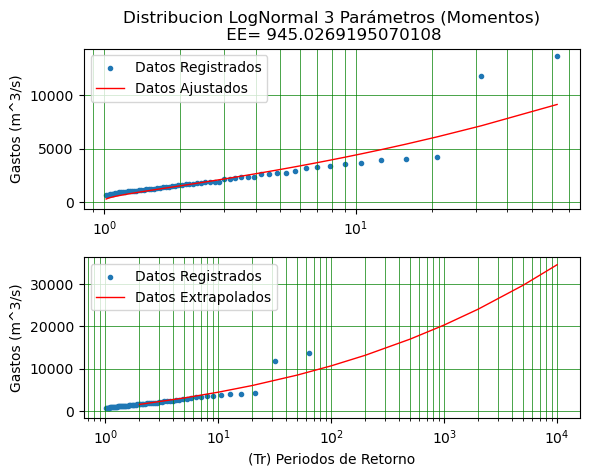

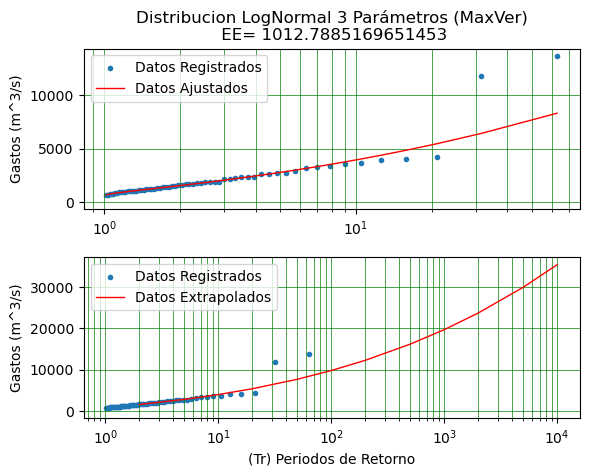

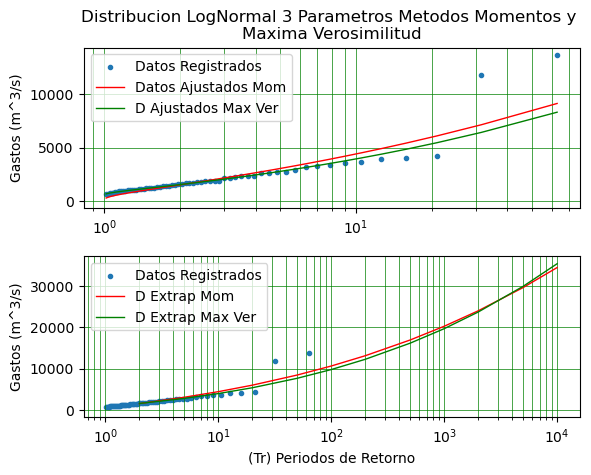

In [16]:
titulo0 = "Distribucion LogNormal 3 Parámetros (Momentos)\n EE= " + str(EE_Mom)
titulo1 = "Distribucion LogNormal 3 Parámetros (MaxVer)\n EE= " + str(EE_MV)

tR = matriz01 [:, 2]
dReg = matriz01 [:, 1]
dAjustMom = matriz01 [:, 5]
dAjustMax = matriz01 [:, 6]
dExtrapMom = matriz02 [:12, 3]
dExtrapMax = matriz02 [:12, 4]
dTrExtrap = matriz02 [:12, 0]
                
pl.subplot(2,1,1)
pl.subplots_adjust(hspace=0.3)
pl.scatter(tR, dReg, label='Datos Registrados', marker='.')
pl.plot(tR, dAjustMom, color="r", linewidth="1.0", linestyle="-", label ="Datos Ajustados")
pl.legend(loc="best")
pl.title(titulo0)
pl.ylabel("Gastos (m^3/s)")
pl.semilogx(True)
pl.grid(True, which='both', color='g', linestyle='-', linewidth=0.5)
        
pl.subplot(2,1,2)
pl.scatter(tR, dReg, label='Datos Registrados', marker='.')
pl.plot(dTrExtrap, dExtrapMom, color="r", linewidth="1.0", linestyle="-", label ="Datos Extrapolados")
pl.legend(loc="best")
pl.ylabel("Gastos (m^3/s)")
pl.xlabel("(Tr) Periodos de Retorno")
pl.semilogx(True)
pl.grid(True, which='both', color='g', linestyle='-', linewidth=0.5)
        
#pl.savefig("salidas/LogNormal3PMomentos.png", dpi=1200)
pl.show()
        
#*********************** * ********************************************************************
        
pl.subplot(2,1,1)
pl.subplots_adjust(hspace=0.3)
pl.scatter(tR, dReg, label='Datos Registrados', marker='.')
pl.plot(tR, dAjustMax, color="r", linewidth="1.0", linestyle="-", label ="Datos Ajustados")
pl.legend(loc="best")
pl.title(titulo1)
pl.ylabel("Gastos (m^3/s)")
pl.semilogx(True)
pl.grid(True, which='both', color='g', linestyle='-', linewidth=0.5)

pl.subplot(2,1,2)
pl.scatter(tR, dReg, label='Datos Registrados', marker='.')
pl.plot(dTrExtrap, dExtrapMax, color="r", linewidth="1.0", linestyle="-", label ="Datos Extrapolados")
pl.legend(loc="best")
pl.ylabel("Gastos (m^3/s)")
pl.xlabel("(Tr) Periodos de Retorno")
pl.semilogx(True)
pl.grid(True, which='both', color='g', linestyle='-', linewidth=0.5)

#pl.savefig("salidas/LogNormal3PMaxV.png", dpi=1200)
pl.show()
        
#*********************** * ********************************************************************

pl.subplot(2,1,1)
pl.subplots_adjust(hspace=0.3)
pl.scatter(tR, dReg, label='Datos Registrados', marker='.')
pl.plot(tR, dAjustMom, color="r", linewidth="1.0", linestyle="-", label ="Datos Ajustados Mom")
pl.plot(tR, dAjustMax, color="g", linewidth="1.0", linestyle="-", label ="D Ajustados Max Ver")
pl.legend(loc="best")
pl.title("Distribucion LogNormal 3 Parametros Metodos Momentos y \nMaxima Verosimilitud")
pl.ylabel("Gastos (m^3/s)")
pl.semilogx(True)
pl.grid(True, which='both', color='g', linestyle='-', linewidth=0.5)

pl.subplot(2,1,2)
pl.scatter(tR, dReg, label='Datos Registrados', marker='.')
pl.plot(dTrExtrap, dExtrapMom, color="r", linewidth="1.0", linestyle="-", label ="D Extrap Mom")
pl.plot(dTrExtrap, dExtrapMax, color="g", linewidth="1.0", linestyle="-", label ="D Extrap Max Ver")
pl.legend(loc="best")
pl.ylabel("Gastos (m^3/s)")
pl.xlabel("(Tr) Periodos de Retorno")
pl.semilogx(True)
pl.grid(True, which='both', color='g', linestyle='-', linewidth=0.5)

#pl.savefig("salidas/LogNormal3PMomMaxV.png", dpi=1200)
pl.show()

In [17]:
# Crear subplots
fig = make_subplots(rows=2, 
                    cols=1, 
                    shared_xaxes=False, 
                    vertical_spacing=0.1, 
                    subplot_titles=("Datos ajustados", "Datos extrapolados"))

# Gráfico 1: Datos Registrados (Scatter) y Datos Ajustados (Línea)
fig.add_trace(go.Scatter(x=tR, 
                         y=dReg, 
                         mode='markers', 
                         name='Datos Registrados', 
                         #alpha=.4, 
                         marker=dict(color='blue')), 
              row=1, col=1)
fig.add_trace(go.Scatter(x=tR, 
                         y=dAjustMom, 
                         mode='lines', 
                         name='Datos Ajustados', 
                         line=dict(color='red', width=1)), 
              row=1, col=1)

fig.add_trace(go.Scatter(x=tR, 
                         y=dReg,
                         mode='markers', 
                         name='Datos Registrados', 
                         #alpha=.4, 
                         marker=dict(color='purple')), 
              row=2, col=1)
fig.add_trace(go.Scatter(x=dTrExtrap, 
                         y=dExtrapMom, 
                         mode='lines', 
                         name='Datos Extrapolados', 
                         line=dict(color='green', 
                         width=1)), 
              row=2, col=1)

# Configurar el layout
fig.update_layout(
    title_text=titulo0,
    #xaxis_type="log",  # Eje x semilogarítmico
    #yaxis_title="Gastos (m³/s)",
    showlegend=True,
    legend=dict(x=0.004, y=0.99)
)

# Configurar ambos ejes x como logarítmicos
fig.update_xaxes(type="log", 
                 range=[0, 2], 
                 showgrid=True, 
                 gridcolor='lightgray', 
                 row=1, col=1)  # Eje x de la primera fila
fig.update_xaxes(type="log", 
                 range=[0, 4], 
                 title="Tr (Periodos de retorno)", 
                 showgrid=True, 
                 gridcolor='lightgray', 
                 row=2, col=1)  # Eje x de la segunda fila
fig.update_yaxes(title_text="Gastos (m³/s)", 
                 showgrid=True, 
                 gridcolor='lightgray', 
                 row=1, col=1)
fig.update_yaxes(title_text="Gastos (m³/s)", 
                 showgrid=True, 
                 gridcolor='lightgray', 
                 row=2, col=1)

# Mostrar el gráfico
fig.show()
#fig.write_html(r'C:\Users\sear2\Music\analisis_frecuencias\Analisis_de_Frecuencias\salidas\grafico_plotly.html')  # Windows
fig.write_html('salidas_notebooks/lognormal_3p_mom.html')  # Linux

In [18]:
# Crear subplots
fig = make_subplots(rows=2, 
                    cols=1, 
                    shared_xaxes=False, 
                    vertical_spacing=0.1, 
                    subplot_titles=("Datos ajustados", "Datos extrapolados"))

# Gráfico 1: Datos Registrados (Scatter) y Datos Ajustados (Línea)
fig.add_trace(go.Scatter(x=tR, 
                         y=dReg, 
                         mode='markers', 
                         name='Datos Registrados', 
                         #alpha=.4, 
                         marker=dict(color='blue')), 
              row=1, col=1)
fig.add_trace(go.Scatter(x=tR, 
                         y=dAjustMax, 
                         mode='lines', 
                         name='Datos Ajustados', 
                         line=dict(color='red', width=1)), 
              row=1, col=1)

fig.add_trace(go.Scatter(x=tR, 
                         y=dReg,
                         mode='markers', 
                         name='Datos Registrados', 
                         #alpha=.4, 
                         marker=dict(color='purple')), 
              row=2, col=1)
fig.add_trace(go.Scatter(x=dTrExtrap, 
                         y=dExtrapMax, 
                         mode='lines', 
                         name='Datos Extrapolados', 
                         line=dict(color='green', 
                         width=1)), 
              row=2, col=1)

# Configurar el layout
fig.update_layout(
    title_text=titulo1,
    #xaxis_type="log",  # Eje x semilogarítmico
    #yaxis_title="Gastos (m³/s)",
    showlegend=True,
    legend=dict(x=0.004, y=0.99)
)

# Configurar ambos ejes x como logarítmicos
fig.update_xaxes(type="log", 
                 range=[0, 2], 
                 showgrid=True, 
                 gridcolor='lightgray', 
                 row=1, col=1)  # Eje x de la primera fila
fig.update_xaxes(type="log", 
                 range=[0, 4], 
                 title="Tr (Periodos de retorno)", 
                 showgrid=True, 
                 gridcolor='lightgray', 
                 row=2, col=1)  # Eje x de la segunda fila
fig.update_yaxes(title_text="Gastos (m³/s)", 
                 showgrid=True, 
                 gridcolor='lightgray', 
                 row=1, col=1)
fig.update_yaxes(title_text="Gastos (m³/s)", 
                 showgrid=True, 
                 gridcolor='lightgray', 
                 row=2, col=1)

# Mostrar el gráfico
fig.show()
#fig.write_html(r'C:\Users\sear2\Music\analisis_frecuencias\Analisis_de_Frecuencias\salidas\grafico_plotly.html')  # Windows
fig.write_html('salidas_notebooks/lognormal_3p_MV.html')  # Linux

In [19]:
# Crear subplots
fig = make_subplots(rows=2, 
                    cols=1, 
                    shared_xaxes=False, 
                    vertical_spacing=0.1, 
                    subplot_titles=("Datos ajustados", "Datos extrapolados"))

# Gráfico 1: Datos Registrados (Scatter) y Datos Ajustados (Línea)
fig.add_trace(go.Scatter(x=tR, 
                         y=dReg, 
                         mode='markers', 
                         name='Datos Registrados', 
                         #alpha=.4, 
                         marker=dict(color='blue')), 
              row=1, col=1)
fig.add_trace(go.Scatter(x=tR, 
                         y=dAjustMom, 
                         mode='lines', 
                         name='Datos Ajustados Momentos', 
                         line=dict(color='green', width=1)), 
              row=1, col=1)
fig.add_trace(go.Scatter(x=tR, 
                         y=dAjustMax, 
                         mode='lines', 
                         name='Datos Ajustados MV', 
                         line=dict(color='red', width=1)), 
              row=1, col=1)

fig.add_trace(go.Scatter(x=tR, 
                         y=dReg,
                         mode='markers', 
                         name='Datos Registrados', 
                         #alpha=.4, 
                         marker=dict(color='purple')), 
              row=2, col=1)
fig.add_trace(go.Scatter(x=dTrExtrap, 
                         y=dExtrapMom, 
                         mode='lines', 
                         name='Datos Extrapolados Momentos', 
                         line=dict(color='green', 
                         width=1)), 
              row=2, col=1)
fig.add_trace(go.Scatter(x=dTrExtrap, 
                         y=dExtrapMax, 
                         mode='lines', 
                         name='Datos Extrapolados MV', 
                         line=dict(color='red', 
                         width=1)), 
              row=2, col=1)

# Configurar el layout
fig.update_layout(
    title_text="Distribucion LogNormal 3 Parametros Metodos Momentos y \nMaxima Verosimilitud",
    #xaxis_type="log",  # Eje x semilogarítmico
    #yaxis_title="Gastos (m³/s)",
    showlegend=True,
    legend=dict(x=0.004, y=0.99)
)

# Configurar ambos ejes x como logarítmicos
fig.update_xaxes(type="log", 
                 range=[0, 2], 
                 showgrid=True, 
                 gridcolor='lightgray', 
                 row=1, col=1)  # Eje x de la primera fila
fig.update_xaxes(type="log", 
                 range=[0, 4], 
                 title="Tr (Periodos de retorno)", 
                 showgrid=True, 
                 gridcolor='lightgray', 
                 row=2, col=1)  # Eje x de la segunda fila
fig.update_yaxes(title_text="Gastos (m³/s)", 
                 showgrid=True, 
                 gridcolor='lightgray', 
                 row=1, col=1)
fig.update_yaxes(title_text="Gastos (m³/s)", 
                 showgrid=True, 
                 gridcolor='lightgray', 
                 row=2, col=1)

# Mostrar el gráfico
fig.show()
#fig.write_html(r'C:\Users\sear2\Music\analisis_frecuencias\Analisis_de_Frecuencias\salidas\grafico_plotly.html')  # Windows
fig.write_html('salidas_notebooks/lognormal_3p_mom_MV.html')  # Linux